# Sprint
## ゲート付きリカレントニューラルネットワーク

## 1.このSprintについて

### Sprintの目的
- 発展的なRNNの手法を理解する
- ドキュメントを網羅的に読む

### どのように学ぶか
Kerasに用意されているRNN関係のレイヤーを動作させながら学んでいきます。

### 2.KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。


[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

### 【問題1】
#### 各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


**LSTMのサンプルコード**


[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)


**ConvLSTM2Dのサンプルコード**


[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [4]:
# LSTM
%run imdb_lstm.py

Using TensorFlow backend.
Loading data...
17465344/17464789 [==============================] - 3s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 66s 3ms/step - loss: 0.5711 - accuracy: 0.7090 - val_loss: 0.4189 - val_accuracy: 0.8280
Epoch 2/5
25000/25000 [==============================] - 68s 3ms/step - loss: 0.3392 - accuracy: 0.8617 - val_loss: 0.3621 - val_accuracy: 0.8418
Epoch 3/5
25000/25000 [==============================] - 72s 3ms/step - loss: 0.2494 - accuracy: 0.9049 - val_loss: 0.3798 - val_accuracy: 0.8350
Epoch 4/5
25000/25000 [==============================] - 66s 3ms/step - loss: 0

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 950 samples, validate on 50 samples
Epoch 1/5
950/950 [==============================] - 345s 364ms/step - loss: 0.7240 - val_loss: 0.6865
Epoch 2/5
950/950 [==============================] - 384s 405ms/step - loss: 0.6615 - val_loss: 0.6774
Epoch 3/5
950/950 [==============================] - 371s 390ms/step - loss: 0.6312 - val_loss: 0.6668
Epoch 4/5
950/950 [==============================] - 409s 430ms/step - loss: 0.6033 - val_loss: 0.6534
Epoch 5/5
950/950 [==============================] - 396s 417ms/step - loss: 0.5687 - val_loss: 0.6346


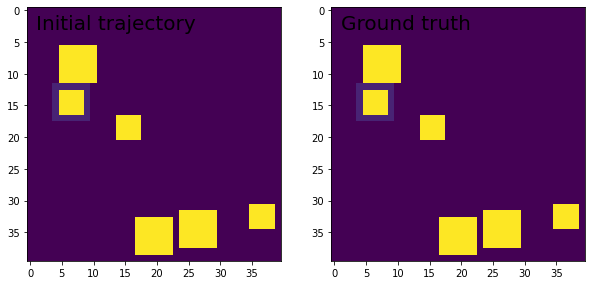

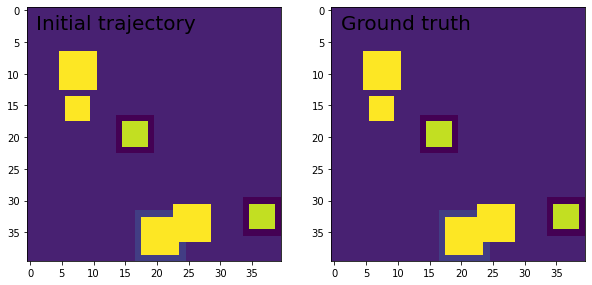

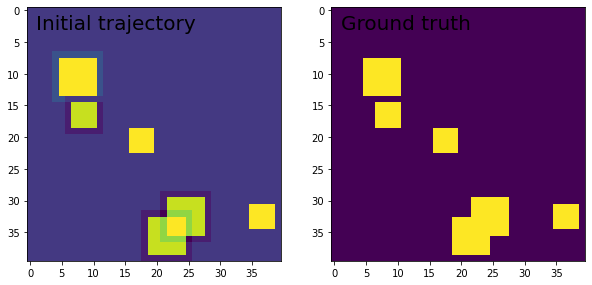

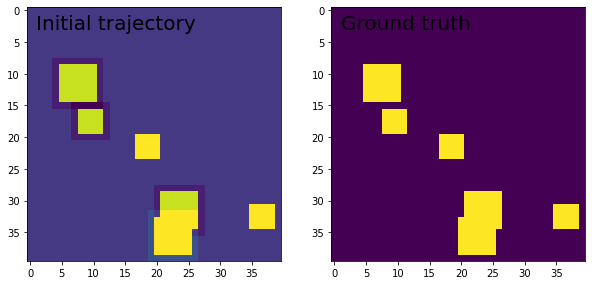

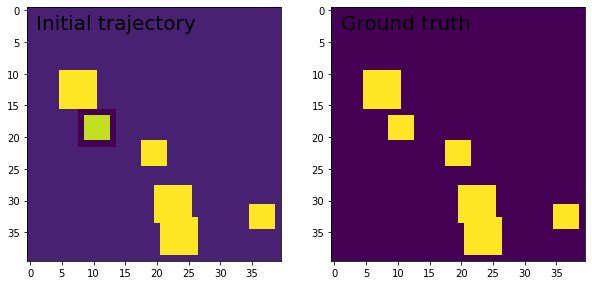

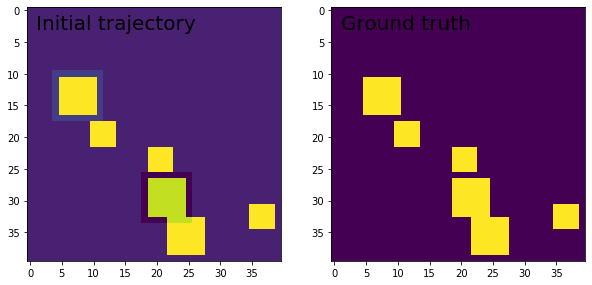

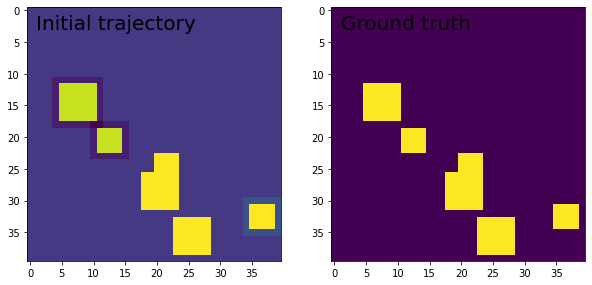

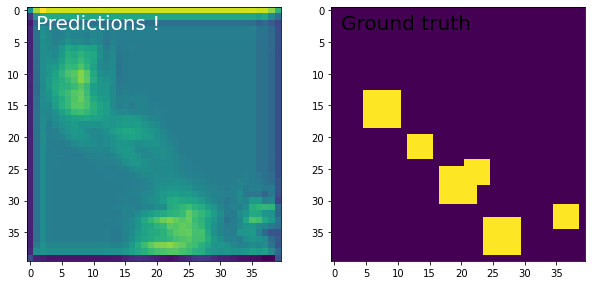

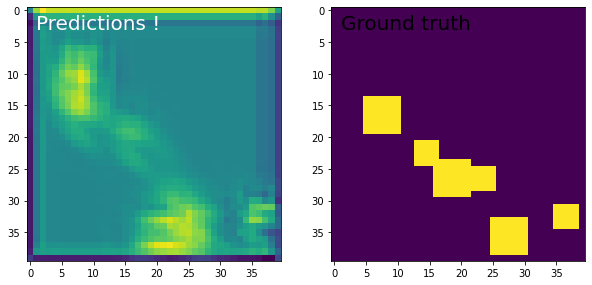

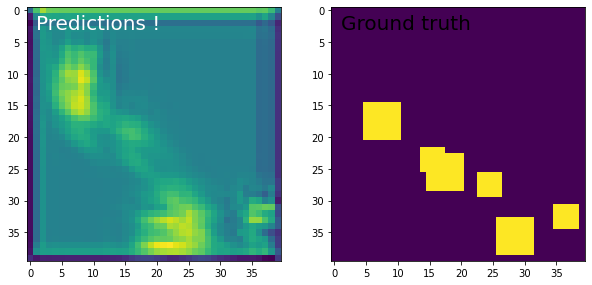

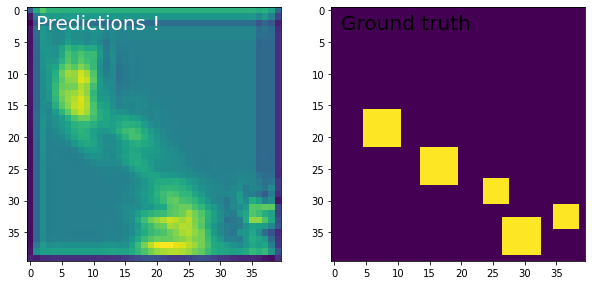

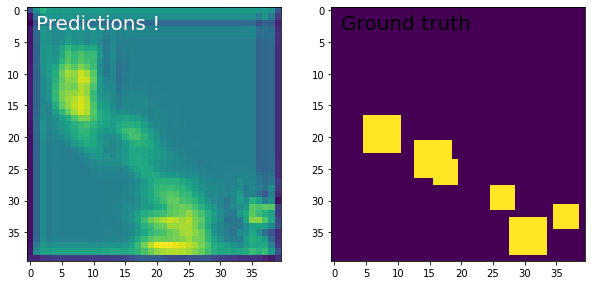

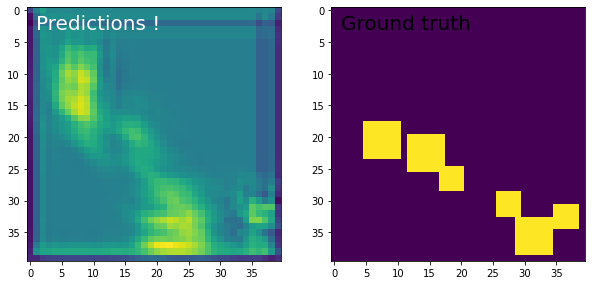

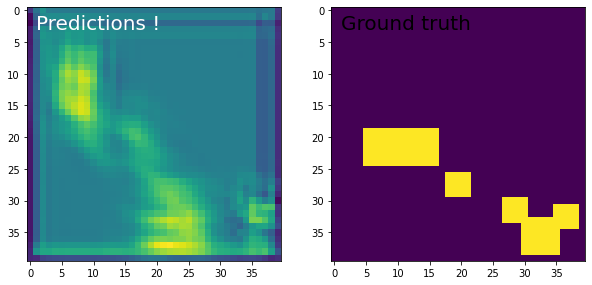

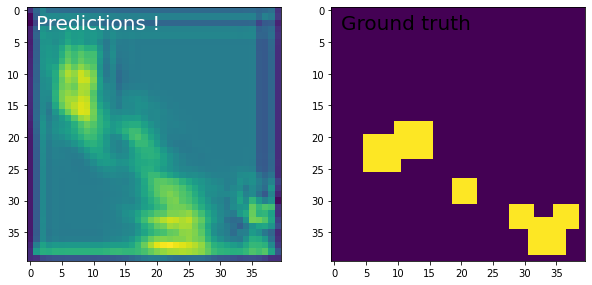

In [1]:
# Conv2LSTM
%run conv_lstm.py

### 【問題2】
#### （アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。


[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

In [4]:
import keras
print(keras.__version__)

2.3.1


In [1]:
# load data
from keras.datasets import reuters
import numpy as np

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print(x_train.shape, y_train.shape)
print(x_train[0], y_train[0])
print(x_test.shape, y_test.shape)
print(x_test[0], y_test[0])

# one-hot encoding
num_class = len(np.unique(np.concatenate((y_train, y_test))))
y_train = np.eye(num_class)[y_train]
y_test = np.eye(num_class)[y_test]
print(y_train.shape, y_test.shape)

Using TensorFlow backend.
Loading data...
8982 train sequences
2246 test sequences
(8982,) (8982,)
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12] 3
(2246,) (2246,)
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 1

In [6]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

max_features = max([max(x) for x in np.concatenate((x_train, x_test))])+1
maxlen = max([len(x) for x in np.concatenate((x_train, x_test))])
batch_size = 512
dim_lstm = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, dim_lstm))
model.add(LSTM(dim_lstm,
               dropout=0.2,
               recurrent_dropout=0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (8982, 2376)
x_test shape: (2246, 2376)
Build model...
Train...

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 440s 49ms/step - loss: 3.7670 - accuracy: 0.3244 - val_loss: 3.6220 - val_accuracy: 0.3816
Epoch 2/10
8982/8982 [==============================] - 472s 53ms/step - loss: 3.1216 - accuracy: 0.3545 - val_loss: 2.6066 - val_accuracy: 0.3620
Epoch 3/10
8982/8982 [==============================] - 471s 52ms/step - loss: 2.5021 - accuracy: 0.3518 - val_loss: 2.4415 - val_accuracy: 0.3620
Epoch 4/10
8982/8982 [==============================] - 457s 51ms/step - loss: 2.4302 - accuracy: 0.3517 - val_loss: 2.4241 - val_accuracy: 0.3620
Epoch 5/10
8982/8982 [==============================] - 516s 57ms/step - loss: 2.4133 - accuracy: 0.3517 - val_loss: 2.4174 - val_accuracy: 0.3620
Epoch 6/10
8982/8982 [==============================] - 488s 54ms/step - loss: 2.4085 - accuracy: 0.3517 -

### 【問題3】
#### 他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

#### RNN
RNN各種の基底クラス

下のCellを引数として渡すことができる。

#### SimpleRNNCell
Cell:RNNの「核」となる部分？

長期記憶機構を持たない単純なRNN機構

`RNN(cell=SimpleRNNCell())`=`SimpleRNN()`となるらしい。

#### GRUCell
GRU: LSTMに近い、長期記憶を持つRNN機構。

のCell

LSTMと違いforget gateを持たない。

#### LSTMCell
Long short-term memory

長期記憶をもつRNN機構。

のCell

GRUに比べてパラメータ数が多く、その結果計算は遅くなるが精度は良くなる。

#### StackedRNNCells

複数のCellを積み上げたスタックを1つのセルのように扱うためのラッパクラス。

RNNに渡すことが出来る。

#### CuDNNGRU

GPU向け深層学習開発環境CuDNNを用いたGRUの実装。

バックエンドはTensorflow GPUでのみ使用可能。

#### CuDNNLSTM

GPU向け深層学習開発環境CuDNNを用いたLSTMの実装。

バックエンドはTensorflow GPUでのみ使用可能。